In [146]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [147]:
df = pd.read_csv("D:\\project\\Salaries\\salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [148]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [149]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [150]:
type(df)

pandas.core.frame.DataFrame

In [151]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [152]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [153]:
df.shape

(397, 6)

In [154]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [155]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [156]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


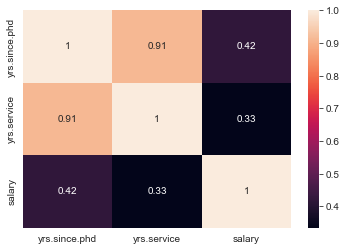

In [157]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [160]:
df.mean()

C:\Users\anumy\AppData\Local\Temp/ipykernel_5104/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [161]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [162]:
df['sex'].value_counts(normalize=True)

Male      0.901763
Female    0.098237
Name: sex, dtype: float64

<AxesSubplot:title={'center':'Sex'}>

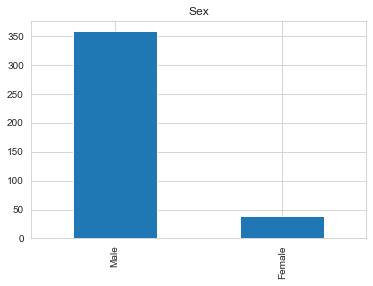

In [163]:
df['sex'].value_counts().plot.bar(title='Sex')

In [164]:
df_copy=df.copy()
add = df_copy['rank']
df_copy.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [165]:
df_copy=df_copy.drop(['rank','yrs.since.phd'], axis=1)
df_copy.head()

,discipline,yrs.service,sex,salary
0,B,18,Male,139750
1,B,16,Male,173200
2,B,3,Male,79750
3,B,39,Male,115000
4,B,41,Male,141500


In [166]:
df_copy["discipline"] = df_copy["discipline"].replace('A','D') 
df_copy.head()

,discipline,yrs.service,sex,salary
0,B,18,Male,139750
1,B,16,Male,173200
2,B,3,Male,79750
3,B,39,Male,115000
4,B,41,Male,141500


In [167]:
df_copy['salary'].mean()

113706.45843828715

In [168]:
df_copy['salary']=df_copy['salary'].fillna(df_copy['salary'].mean())
df_copy.head()

,discipline,yrs.service,sex,salary
0,B,18,Male,139750
1,B,16,Male,173200
2,B,3,Male,79750
3,B,39,Male,115000
4,B,41,Male,141500


In [169]:
df_sorted=df.sort_values(by='yrs.service')
df_sorted.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
154,AsstProf,B,4,0,Male,92000
127,AsstProf,A,2,0,Female,72500
164,AsstProf,B,1,0,Male,88795
28,AsstProf,B,11,0,Male,77000
287,AsstProf,A,2,0,Male,85000


In [170]:
df.sort_values(by = 'yrs.service', ascending = False, inplace = True)
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
330,Prof,B,49,60,Male,192253
131,Prof,A,56,57,Male,76840
194,AssocProf,B,48,53,Male,90000
282,Prof,A,51,51,Male,57800
285,AssocProf,A,49,49,Male,81800


In [171]:
df['discipline'] = df['discipline'].map({'A':1,'B':2})
df['discipline'].head(10)

330    2
131    1
194    2
282    1
285    1
125    1
350    2
276    1
279    1
261    1
Name: discipline, dtype: int64

C:\Users\anumy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


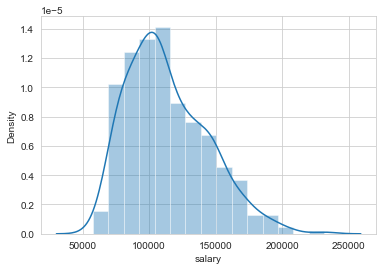

In [172]:
sns.distplot(df['salary']);

<AxesSubplot:xlabel='rank'>

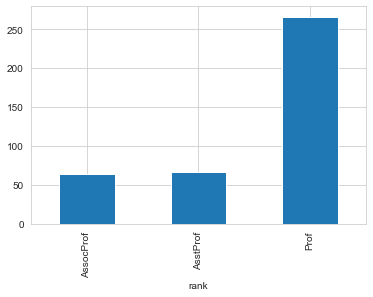

In [173]:
df.groupby(['rank'])['salary'].count().plot(kind='bar')

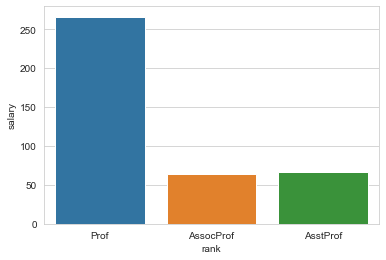

In [174]:
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

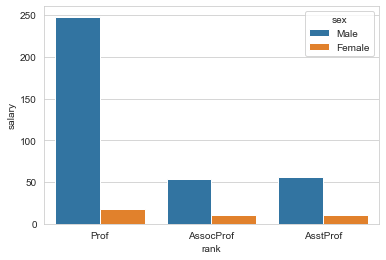

In [175]:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

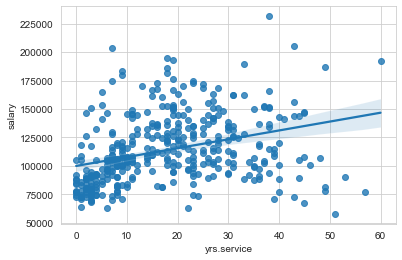

In [176]:
sns.regplot(x='yrs.service', y='salary', data=df)

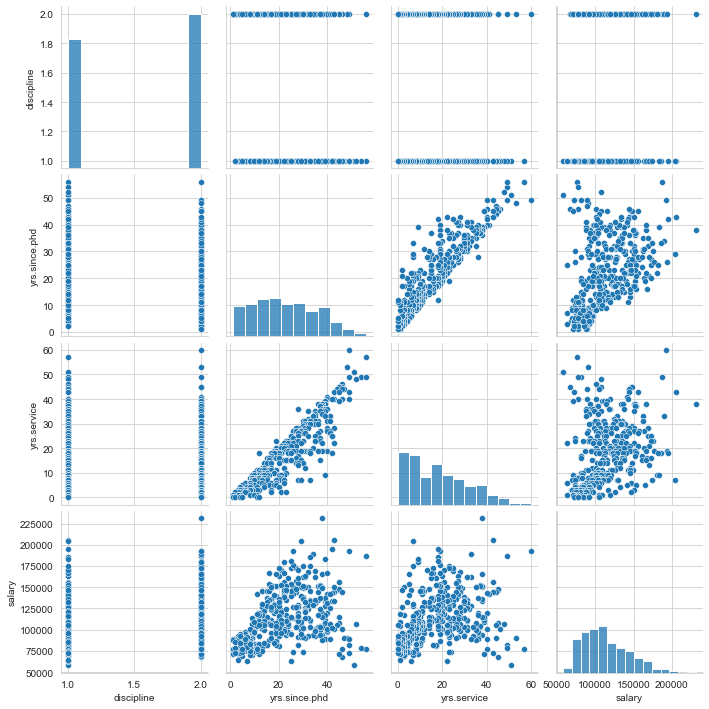

In [177]:
sns.pairplot(df)